In [1]:
import pandas as pd

titanic_df = pd.read_csv("Titanic_data.csv")

## DataFrame Exploration

**Basic Information**

In [2]:
titanic_df.shape

(891, 12)

In [3]:
titanic_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
titanic_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [6]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Specific Information

In [7]:
# dataframe.describe()
titanic_df[['Age','Fare']].describe()

,Age,Fare
count,714.000000,891.000000
mean,29.699118,32.204208
std,14.526497,49.693429
min,0.420000,0.000000
25%,20.125000,7.910400
50%,28.000000,14.454200
75%,38.000000,31.000000
max,80.000000,512.329200


Description: 

    * avergae Age of passanger is 29, which suggest most of the passengers are young people.
    * For Fare, Mean and medain are vastly seperated , suggesting skewed distribution.

In [8]:
# dataframe.value_counts()
titanic_df.value_counts('Survived', normalize=True, ascending=True)

Survived
1    0.383838
0    0.616162
Name: proportion, dtype: float64

In [9]:
titanic_df[titanic_df['Sex'] == "female"].value_counts(
    'Survived'
)

Survived
1    233
0     81
Name: count, dtype: int64

In [10]:
titanic_df.value_counts(['Sex','Survived'], normalize=True)

Sex     Survived
male    0           0.525253
female  1           0.261504
male    1           0.122334
female  0           0.090909
Name: proportion, dtype: float64

Interestingly, survival rate of female is near to death rate of male population.

In [11]:
# dataframe.nunique() and dataframe.unique()

titanic_df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [12]:
titanic_df['Embarked'].nunique(dropna = True)

3

In [13]:
# dataframe.isna().sum()
titanic_df.isna().sum() #< Finding total null values in each columns

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [14]:
# dataframe.groupby(by= .. )
group_by_gender = titanic_df[['Sex','Fare','Age','Survived']].groupby(by='Sex')

In [15]:
group_by_gender.mean()

,Fare,Age,Survived
Sex,,,
female,44.479818,27.915709,0.742038
male,25.523893,30.726645,0.188908


In [26]:
group_by_embarked = titanic_df[['Fare','Age','Survived','Embarked']].groupby(by=['Embarked','Survived'])

In [30]:
group_by_embarked.median()

Fare    Age
Embarked Survived                 
C        0         14.45830  30.00
         1         56.92920  27.00
Q        0          7.75000  30.75
         1          7.80835  20.50
S        0         10.50000  28.00
         1         26.00000  28.00

In [31]:
## Correlation and Covariance

In [34]:
titanic_df[['Age','Fare']].corr()

,Age,Fare
Age,1.000000,0.096067
Fare,0.096067,1.000000


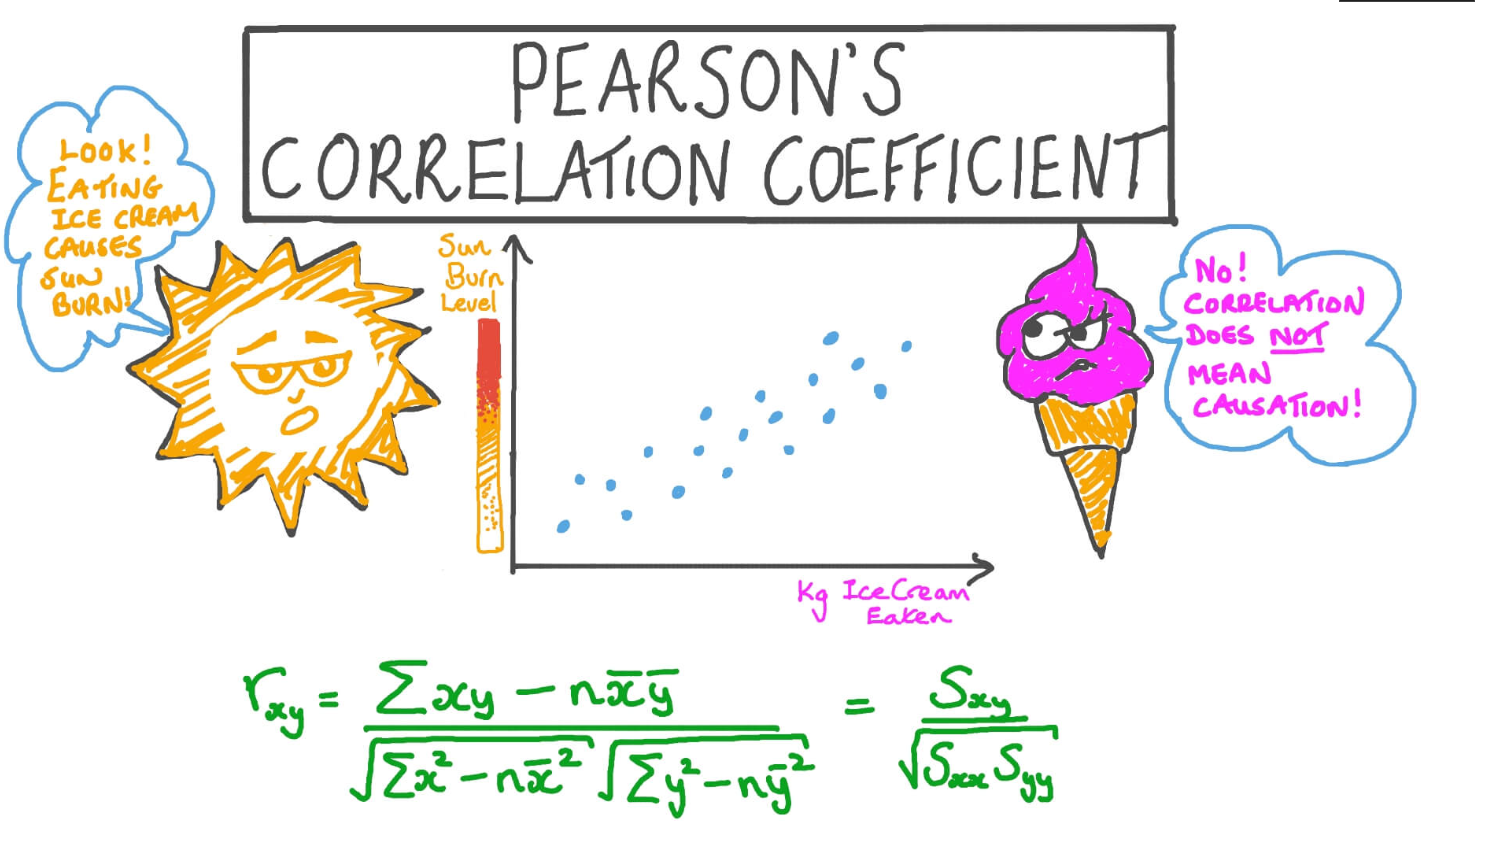

In [35]:
titanic_df[['Age','Fare']].cov()

,Age,Fare
Age,211.019125,73.849030
Fare,73.849030,2469.436846


In [41]:
# sample()
titanic_df.sample(n = 5, random_state=99)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
247,248,1,2,"Hamalainen, Mrs. William (Anna)",female,24.0,0,2,250649,14.5000,NaN,S
823,824,1,3,"Moor, Mrs. (Beila)",female,27.0,0,1,392096,12.4750,E121,S
566,567,0,3,"Stoytcheff, Mr. Ilia",male,19.0,0,0,349205,7.8958,NaN,S
666,667,0,2,"Butler, Mr. Reginald Fenton",male,25.0,0,0,234686,13.0000,NaN,S
199,200,0,2,"Yrois, Miss. Henriette (""Mrs Harbeck"")",female,24.0,0,0,248747,13.0000,NaN,S
